In [1]:
#! pip install pyadi-iio
#! pip install matplotlib
#! pip install scikit-dsp-comm
#! pip install scikit-commpy

In [2]:
import adi
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

ModuleNotFoundError: No module named 'adi'

In [ ]:
# Configuración del SDR
Uri = "ip:192.168.1.32"
Loopback = 0
Tx_cyclic_buffer = False
TxAtten = -70
GainControlModes = "manual"
RxHardwareGain = 70
RxBufferSize = 2**20

sdr = adi.Pluto(Uri)
sdr.loopback = Loopback
sdr.tx_cyclic_buffer = Tx_cyclic_buffer
sdr.tx_hardwaregain_chan0 = TxAtten
sdr.rx_hardwaregain_chan0 = RxHardwareGain
sdr.gain_control_mode_chan0 = GainControlModes
sdr.rx_buffer_size = RxBufferSize

In [ ]:
# Deshabilitar transmisión y asegurarse de recibir solo ruido
sdr.tx_destroy_buffer()
sdr.tx_hardwaregain_chan0 = -89  # Atenuación máxima
sdr.tx_lo = int(2400e6)  # Transmitir en frecuencia distinta
sdr.rx_lo = int(950e6)   # Frecuencia de recepción
sdr.tx(np.zeros(2048))  # No transmitir nada


In [ ]:
# Capturar señal recibida
rxSignal = sdr.rx()
I = np.real(rxSignal)
Q = np.imag(rxSignal)


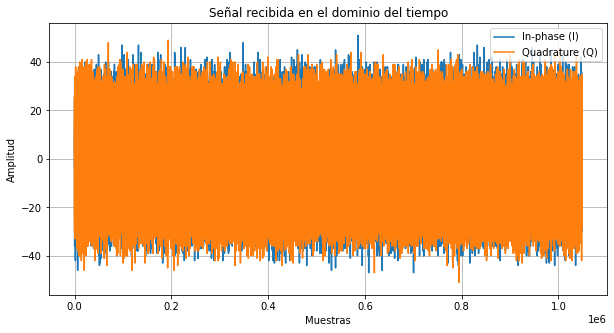

In [ ]:
# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(10, 5))
plt.plot(I, label="In-phase (I)")
plt.plot(Q, label="Quadrature (Q)")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.title("Señal recibida en el dominio del tiempo")
plt.grid()
plt.show()

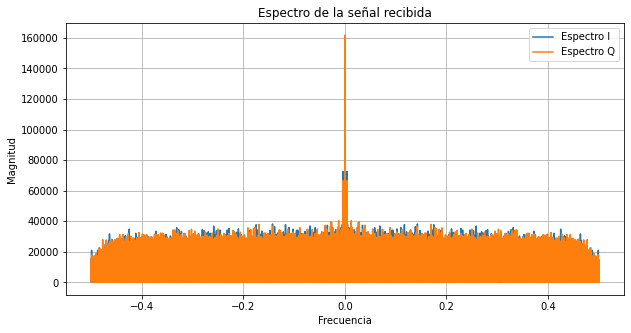

In [ ]:
# Transformada de Fourier para visualizar en frecuencia
freqs = np.fft.fftfreq(len(I), 1)
fft_I = np.fft.fft(I)
fft_Q = np.fft.fft(Q)

plt.figure(figsize=(10, 5))
plt.plot(freqs, np.abs(fft_I), label="Espectro I")
plt.plot(freqs, np.abs(fft_Q), label="Espectro Q")
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.legend()
plt.title("Espectro de la señal recibida")
plt.grid()
plt.show()


In [ ]:
# Calcular estadísticos
mean_I = np.mean(I)
mean_Q = np.mean(Q)
var_I = np.var(I)
var_Q = np.var(Q)

print(f"Media I: {mean_I}, Media Q: {mean_Q}")
print(f"Varianza I: {var_I}, Varianza Q: {var_Q}")


Media I: -0.0207061767578125, Media Q: -0.02413654327392578
Varianza I: 107.83313791989349, Varianza Q: 107.56146824667539


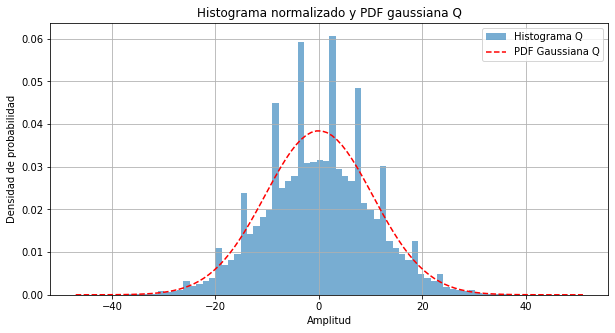

In [ ]:
# Superponer PDF gaussiana
x = np.linspace(min(I), max(I), 100)
pdf_Q = norm.pdf(x, mean_I, np.sqrt(var_I))

plt.figure(figsize=(10, 5))
plt.hist(I, bins=80, density=True, alpha=0.6, label="Histograma Q")
plt.plot(x, pdf_Q, label="PDF Gaussiana Q", linestyle="dashed", color='r')
plt.xlabel("Amplitud")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.title("Histograma normalizado y PDF gaussiana Q")
plt.grid()
plt.show()


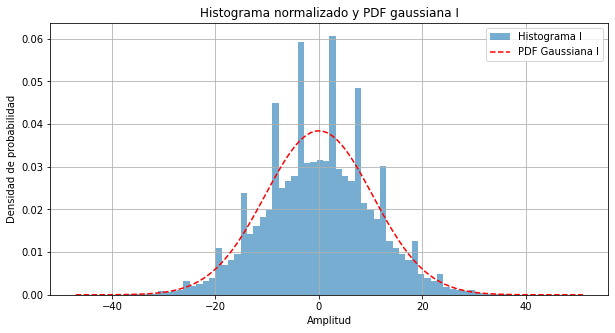

In [ ]:
# Superponer PDF gaussiana
x = np.linspace(min(I), max(I), 100)
pdf_I = norm.pdf(x, mean_I, np.sqrt(var_I))

plt.figure(figsize=(10, 5))
plt.hist(I, bins=80, density=True, alpha=0.6, label="Histograma I")
plt.plot(x, pdf_I, label="PDF Gaussiana I", linestyle="dashed", color='r')
plt.xlabel("Amplitud")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.title("Histograma normalizado y PDF gaussiana I")
plt.grid()
plt.show()


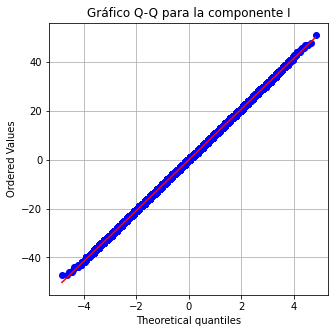

In [ ]:
# Gráfico Q-Q
plt.figure(figsize=(5, 5))
stats.probplot(I, dist="norm", plot=plt)
plt.title("Gráfico Q-Q para la componente I")
plt.grid()
plt.show()


In [ ]:
# Generar variable gaussiana sintética
I_synth = np.random.normal(mean_I, np.sqrt(var_I), len(I))
Q_synth = np.random.normal(mean_Q, np.sqrt(var_Q), len(Q))

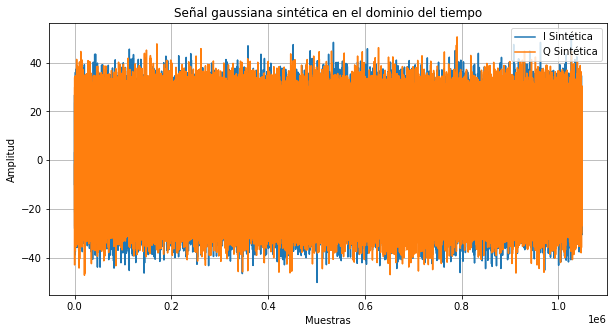

In [ ]:
# Graficar la señal gaussiana sintética en el tiempo
plt.figure(figsize=(10, 5))
plt.plot(I_synth, label="I Sintética")
plt.plot(Q_synth, label="Q Sintética")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.title("Señal gaussiana sintética en el dominio del tiempo")
plt.grid()
plt.show()

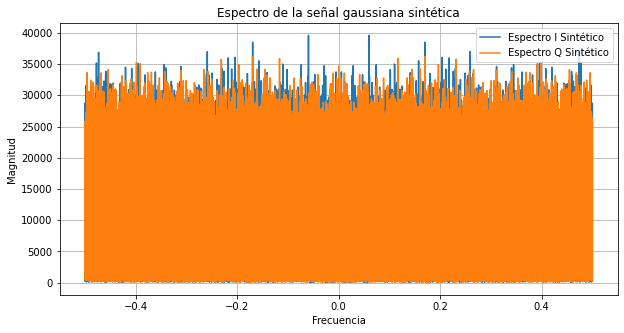

In [ ]:
# Espectro de la señal gaussiana sintética
fft_I_synth = np.fft.fft(I_synth)
fft_Q_synth = np.fft.fft(Q_synth)

plt.figure(figsize=(10, 5))
plt.plot(freqs, np.abs(fft_I_synth), label="Espectro I Sintético")
plt.plot(freqs, np.abs(fft_Q_synth), label="Espectro Q Sintético")
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.legend()
plt.title("Espectro de la señal gaussiana sintética")
plt.grid()
plt.show()

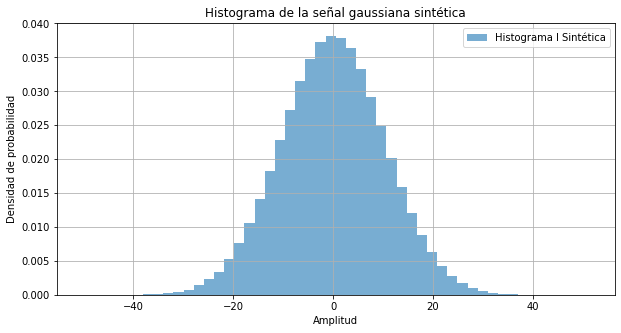

In [ ]:
# Histograma de la señal gaussiana sintética
plt.figure(figsize=(10, 5))
plt.hist(I_synth, bins=50, density=True, alpha=0.6, label="Histograma I Sintética")
plt.xlabel("Amplitud")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.title("Histograma de la señal gaussiana sintética")
plt.grid()
plt.show()

In [ ]:
# Cerrar SDR
sdr.tx_destroy_buffer()
del sdr


In [ ]:
print("En esta práctica, se analizó el ruido del canal en ausencia de transmisión utilizando un receptor SDR. Se verificó que las componentes en fase (I) y en cuadratura (Q) siguen una distribución aproximadamente gaussiana, lo cual se confirmó mediante histogramas, gráficos de densidad y un análisis Q-Q. Además, la señal generada con la misma media y varianza mostró un comportamiento similar, validando el modelo teórico. Estos resultados refuerzan la importancia de caracterizar el ruido para optimizar el rendimiento de los sistemas de comunicación inalámbrica.")

En esta práctica, se analizó el ruido del canal en ausencia de transmisión utilizando un receptor SDR. Se verificó que las componentes en fase (I) y en cuadratura (Q) siguen una distribución aproximadamente gaussiana, lo cual se confirmó mediante histogramas, gráficos de densidad y un análisis Q-Q. Además, la señal generada con la misma media y varianza mostró un comportamiento similar, validando el modelo teórico. Estos resultados refuerzan la importancia de caracterizar el ruido para optimizar el rendimiento de los sistemas de comunicación inalámbrica.
